In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

np.random.seed(123)
sns.set_style('whitegrid')

![Question 1](..\artifacts\question_snipped\Q1.png)

### Problem 1: Monte Carlo Integration with Control Variates
#### Estimate: $I = \int_0^1 xe^{-x^2}dx$ using $g(X) = Xe^{-X^2}$ where $X \sim U(0,1)$

Part (a): Analytical Expectations of Control Variates

In [18]:
E_f1 = 1/2
E_f2 = 1/3
E_f3 = 1 - np.exp(-1)

print("Analytical Expectations:")
print(f"E[f1(x)] = E[x] = {E_f1}")
print(f"E[f2(x)] = E[x²] = {E_f2:.6f}")
print(f"E[f3(x)] = E[e^(-x)] = {E_f3:.6f}")

Analytical Expectations:
E[f1(x)] = E[x] = 0.5
E[f2(x)] = E[x²] = 0.333333
E[f3(x)] = E[e^(-x)] = 0.632121


Part (b): Correlation Analysis (n=5000)

In [19]:
n = 5000
X = np.random.uniform(0, 1, n)

g_X = X * np.exp(-X**2)
f1_X = X
f2_X = X**2
f3_X = np.exp(-X)

cor_g_f1 = np.corrcoef(g_X, f1_X)[0, 1]
cor_g_f2 = np.corrcoef(g_X, f2_X)[0, 1]
cor_g_f3 = np.corrcoef(g_X, f3_X)[0, 1]

print("Correlations:")
print(f"Cor(g(X), f1(X)) = {cor_g_f1:.4f}")
print(f"Cor(g(X), f2(X)) = {cor_g_f2:.4f}")
print(f"Cor(g(X), f3(X)) = {cor_g_f3:.4f}")

Correlations:
Cor(g(X), f1(X)) = 0.8698
Cor(g(X), f2(X)) = 0.7176
Cor(g(X), f3(X)) = -0.9251


Part (c): Best Control Variate and Optimal Constant c*

In [20]:
correlations = np.array([cor_g_f1, cor_g_f2, cor_g_f3])
abs_correlations = np.abs(correlations)
best_idx = np.argmax(abs_correlations)

f_options = [f1_X, f2_X, f3_X]
E_options = [E_f1, E_f2, E_f3]
f_names = ['f1(x) = x', 'f2(x) = x²', 'f3(x) = e^(-x)']

f_best = f_options[best_idx]
E_f_best = E_options[best_idx]
f_name = f_names[best_idx]

c_star = -np.cov(g_X, f_best)[0, 1] / np.var(f_best)

print(f"Best control variate: {f_name}")
print(f"Correlation: {abs_correlations[best_idx]:.4f}")
print(f"Optimal constant c* = {c_star:.4f}")

Best control variate: f3(x) = e^(-x)
Correlation: 0.9251
Optimal constant c* = 0.6479


Part (d): Variance Comparison

In [21]:
I_standard = np.mean(g_X)
var_standard = np.var(g_X, ddof=1) / n

I_cv = np.mean(g_X) + c_star * (np.mean(f_best) - E_f_best)
var_cv = np.var(g_X + c_star * (f_best - E_f_best), ddof=1) / n

true_value = (1 - np.exp(-1)) / 2
variance_reduction = (1 - var_cv/var_standard) * 100

print("\nResults:")
print(f"Standard MC Estimate: {I_standard:.6f}")
print(f"Standard MC Variance: {var_standard:.8f}")
print(f"\nControl Variate Estimate: {I_cv:.6f}")
print(f"Control Variate Variance: {var_cv:.8f}")
print(f"\nVariance Reduction: {variance_reduction:.2f}%")
print(f"Efficiency Gain: {var_standard/var_cv:.2f}x")
print(f"\nTrue Value: {true_value:.6f}")
print(f"Standard MC Error: {abs(I_standard - true_value):.6f}")
print(f"Control Variate Error: {abs(I_cv - true_value):.6f}")


Results:
Standard MC Estimate: 0.314360
Standard MC Variance: 0.00000327

Control Variate Estimate: 0.315604
Control Variate Variance: 0.00000047

Variance Reduction: 85.58%
Efficiency Gain: 6.94x

True Value: 0.316060
Standard MC Error: 0.001700
Control Variate Error: 0.000456


![Question 2](..\artifacts\question_snipped\Q2.png)

![Question 1](..\artifacts\question_snipped\Q2_1.png)

### Problem 2: Stratified Sampling
#### Estimate: $I = \int_0^1 \frac{\sin(\pi x)}{1+x}dx$

Part (a): List Strata Explicitly

In [22]:
print("Plan A: 10 Equal Intervals")
strata_A = [(i/10, (i+1)/10) for i in range(10)]
for i, (a, b) in enumerate(strata_A, 1):
    print(f"Stratum {i:2d}: [{a:.1f}, {b:.1f}]")

print("\nPlan B: 5 Equal Strata")
strata_B = [(i/5, (i+1)/5) for i in range(5)]
for i, (a, b) in enumerate(strata_B, 1):
    print(f"Stratum {i}: [{a:.1f}, {b:.1f}]")

Plan A: 10 Equal Intervals
Stratum  1: [0.0, 0.1]
Stratum  2: [0.1, 0.2]
Stratum  3: [0.2, 0.3]
Stratum  4: [0.3, 0.4]
Stratum  5: [0.4, 0.5]
Stratum  6: [0.5, 0.6]
Stratum  7: [0.6, 0.7]
Stratum  8: [0.7, 0.8]
Stratum  9: [0.8, 0.9]
Stratum 10: [0.9, 1.0]

Plan B: 5 Equal Strata
Stratum 1: [0.0, 0.2]
Stratum 2: [0.2, 0.4]
Stratum 3: [0.4, 0.6]
Stratum 4: [0.6, 0.8]
Stratum 5: [0.8, 1.0]


### Part (b): Stratified Estimator Formula
$$\hat{I}_{strat} = \sum_{h=1}^{L} L_h \bar{g}_h$$
where $L_h$ is the length of stratum $h$ and $\bar{g}_h$ is the sample mean in stratum $h$

### Part (c): Variance Formula
$$Var(\hat{I}_{strat}) = \sum_{h=1}^{L} L_h^2 \frac{\sigma_h^2}{n_h}$$
where $\sigma_h^2$ is the variance in stratum $h$ and $n_h$ is the sample size in stratum $h$

Part (d): Implementation and Comparison

In [23]:
def h(x):
    return np.sin(np.pi * x) / (1 + x)

N = 5000

n_strata_A = len(strata_A)
n_per_stratum_A = N // n_strata_A

estimates_A = []
variances_A = []
lengths_A = []

for a, b in strata_A:
    lengths_A.append(b - a)
    X_h = np.random.uniform(a, b, n_per_stratum_A)
    h_X = h(X_h)
    estimates_A.append(np.mean(h_X))
    variances_A.append(np.var(h_X, ddof=1))

lengths_A = np.array(lengths_A)
estimates_A = np.array(estimates_A)
variances_A = np.array(variances_A)

I_strat_A = np.sum(lengths_A * estimates_A)
var_strat_A = np.sum(lengths_A**2 * variances_A / n_per_stratum_A)

print("Plan A Results:")
print(f"Estimate: {I_strat_A:.6f}")
print(f"Variance: {var_strat_A:.8f}")
print(f"Std Error: {np.sqrt(var_strat_A):.6f}")

Plan A Results:
Estimate: 0.434618
Variance: 0.00000039
Std Error: 0.000623


In [24]:
n_prelim = 1000
n_strata_B = len(strata_B)
S_h = []

for a, b in strata_B:
    X_prelim = np.random.uniform(a, b, n_prelim)
    S_h.append(np.std(h(X_prelim), ddof=1))

S_h = np.array(S_h)
n_h = np.round(N * S_h / np.sum(S_h)).astype(int)
n_h[-1] = N - np.sum(n_h[:-1])

print("\nPlan B Sample Allocation:")
for i, (nh, sh) in enumerate(zip(n_h, S_h), 1):
    print(f"Stratum {i}: n_h = {nh:4d} (S_h = {sh:.4f})")

estimates_B = []
variances_B = []
lengths_B = []

for (a, b), nh in zip(strata_B, n_h):
    lengths_B.append(b - a)
    X_h = np.random.uniform(a, b, nh)
    h_X = h(X_h)
    estimates_B.append(np.mean(h_X))
    variances_B.append(np.var(h_X, ddof=1))

lengths_B = np.array(lengths_B)
estimates_B = np.array(estimates_B)
variances_B = np.array(variances_B)

I_strat_B = np.sum(lengths_B * estimates_B)
var_strat_B = np.sum(lengths_B**2 * variances_B / n_h)

print("\nPlan B Results:")
print(f"Estimate: {I_strat_B:.6f}")
print(f"Variance: {var_strat_B:.8f}")
print(f"Std Error: {np.sqrt(var_strat_B):.6f}")


Plan B Sample Allocation:
Stratum 1: n_h = 1741 (S_h = 0.1381)
Stratum 2: n_h =  713 (S_h = 0.0565)
Stratum 3: n_h =  331 (S_h = 0.0263)
Stratum 4: n_h =  989 (S_h = 0.0785)
Stratum 5: n_h = 1226 (S_h = 0.0973)

Plan B Results:
Estimate: 0.436440
Variance: 0.00000123
Std Error: 0.001111


In [25]:
X_mc = np.random.uniform(0, 1, N)
I_mc = np.mean(h(X_mc))
var_mc = np.var(h(X_mc), ddof=1) / N

print("\nStandard Monte Carlo:")
print(f"Estimate: {I_mc:.6f}")
print(f"Variance: {var_mc:.8f}")
print(f"Std Error: {np.sqrt(var_mc):.6f}")

print("\nComparison:")
print(f"Plan A variance reduction: {(1 - var_strat_A/var_mc)*100:.2f}%")
print(f"Plan B variance reduction: {(1 - var_strat_B/var_mc)*100:.2f}%")
print(f"Plan B vs Plan A: {(1 - var_strat_B/var_strat_A)*100:.2f}% better")


Standard Monte Carlo:
Estimate: 0.437501
Variance: 0.00000860
Std Error: 0.002933

Comparison:
Plan A variance reduction: 95.49%
Plan B variance reduction: 85.65%
Plan B vs Plan A: -218.17% better


![Question 1](..\artifacts\question_snipped\Q3.png)

### Problem 3: Bootstrap Analysis of Correlation

Part (a): Original Correlation

In [26]:
faithful = pd.read_csv('../data/faithful.csv')

original_cor = faithful['eruptions'].corr(faithful['waiting'])
print(f"Original Correlation: {original_cor:.4f}")

Original Correlation: 0.9008


Part (b): Bootstrap Sampling (B=10,000)

In [27]:
B = 10000
n_obs = len(faithful)
bootstrap_cors = []

for b in range(B):
    indices = np.random.choice(n_obs, n_obs, replace=True)
    boot_sample = faithful.iloc[indices]
    bootstrap_cors.append(boot_sample['eruptions'].corr(boot_sample['waiting']))

bootstrap_cors = np.array(bootstrap_cors)
print(f"Bootstrap sampling completed: {B} samples")

Bootstrap sampling completed: 10000 samples


Part (c): Visualization

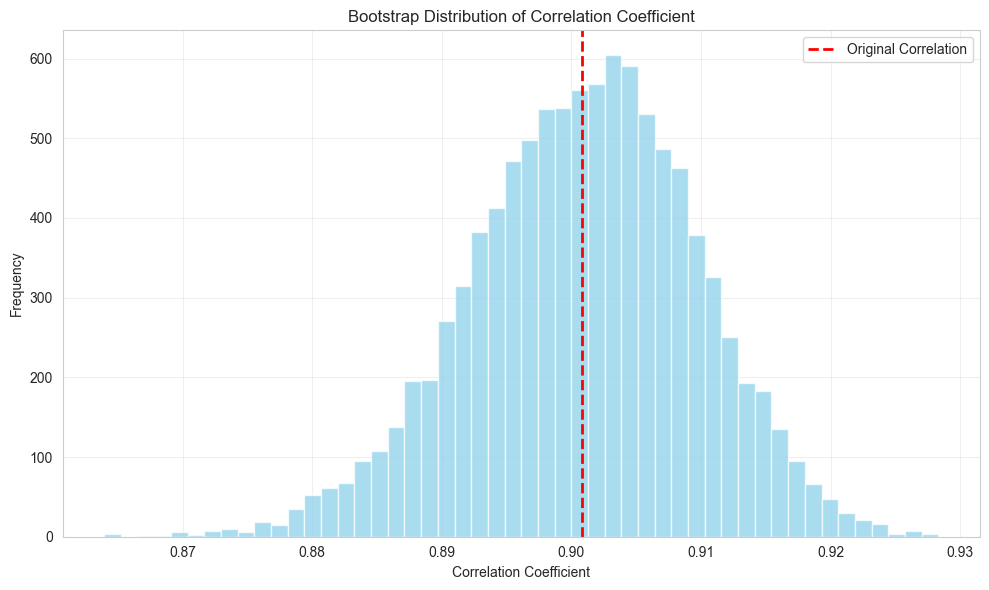

In [28]:
plt.figure(figsize=(10, 6))
plt.hist(bootstrap_cors, bins=50, color='skyblue', edgecolor='white', alpha=0.7)
plt.axvline(original_cor, color='red', linestyle='--', linewidth=2, label='Original Correlation')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Frequency')
plt.title('Bootstrap Distribution of Correlation Coefficient')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('../artifacts/bootstrap_histogram.png', dpi=300, bbox_inches='tight')
plt.show()

Part (d): 90% Confidence Interval

In [29]:
ci_lower = np.percentile(bootstrap_cors, 5)
ci_upper = np.percentile(bootstrap_cors, 95)

print(f"90% Confidence Interval: [{ci_lower:.4f}, {ci_upper:.4f}]")

90% Confidence Interval: [0.8860, 0.9148]


Part (e): Standard Error and Bias

In [30]:
se_boot = np.std(bootstrap_cors, ddof=1)
bias_boot = np.mean(bootstrap_cors) - original_cor

print(f"Standard Error: {se_boot:.6f}")
print(f"Bias: {bias_boot:.6f}")

Standard Error: 0.008763
Bias: 0.000092


![Question 1](..\artifacts\question_snipped\Q4.png)

### Problem 4: Type I Error Simulation

In [31]:
def simulate_type1_error(dist_name, sample_size, M, alpha, mu0):
    rejections = 0
    
    for m in range(M):
        if dist_name == 'chisq':
            x = np.random.chisquare(df=1, size=sample_size)
        elif dist_name == 'uniform':
            x = np.random.uniform(0, 2, sample_size)
        elif dist_name == 'exponential':
            x = np.random.exponential(scale=1, size=sample_size)
        
        t_stat, p_value = stats.ttest_1samp(x, mu0)
        
        if p_value < alpha:
            rejections += 1
    
    return rejections / M

alpha = 0.05
M = 10000
sample_sizes = [10, 30, 50, 100]

Case (i): χ²(1) distribution (μ₀ = 1)

In [32]:
mu0_chisq = 1
results_chisq = []

print("χ²(1) Distribution:")
for n in sample_sizes:
    type1_error = simulate_type1_error('chisq', n, M, alpha, mu0_chisq)
    results_chisq.append(type1_error)
    print(f"n = {n:3d}: Empirical Type I Error = {type1_error:.4f}")

χ²(1) Distribution:
n =  10: Empirical Type I Error = 0.1392
n =  30: Empirical Type I Error = 0.0930
n =  50: Empirical Type I Error = 0.0788
n = 100: Empirical Type I Error = 0.0666


Case (ii): Uniform(0,2) distribution (μ₀ = 1)

In [33]:
mu0_uniform = 1
results_uniform = []

print("\nUniform(0,2) Distribution:")
for n in sample_sizes:
    type1_error = simulate_type1_error('uniform', n, M, alpha, mu0_uniform)
    results_uniform.append(type1_error)
    print(f"n = {n:3d}: Empirical Type I Error = {type1_error:.4f}")


Uniform(0,2) Distribution:
n =  10: Empirical Type I Error = 0.0590
n =  30: Empirical Type I Error = 0.0512
n =  50: Empirical Type I Error = 0.0517
n = 100: Empirical Type I Error = 0.0534


Case (iii): Exponential(rate=1) distribution (μ₀ = 1)

In [34]:
mu0_exp = 1
results_exp = []

print("\nExponential(rate=1) Distribution:")
for n in sample_sizes:
    type1_error = simulate_type1_error('exponential', n, M, alpha, mu0_exp)
    results_exp.append(type1_error)
    print(f"n = {n:3d}: Empirical Type I Error = {type1_error:.4f}")


Exponential(rate=1) Distribution:
n =  10: Empirical Type I Error = 0.0961
n =  30: Empirical Type I Error = 0.0722
n =  50: Empirical Type I Error = 0.0673
n = 100: Empirical Type I Error = 0.0585


### Summary and Visualization


Summary Table:
 Sample_Size  ChiSquare  Uniform  Exponential
          10     0.1392   0.0590       0.0961
          30     0.0930   0.0512       0.0722
          50     0.0788   0.0517       0.0673
         100     0.0666   0.0534       0.0585


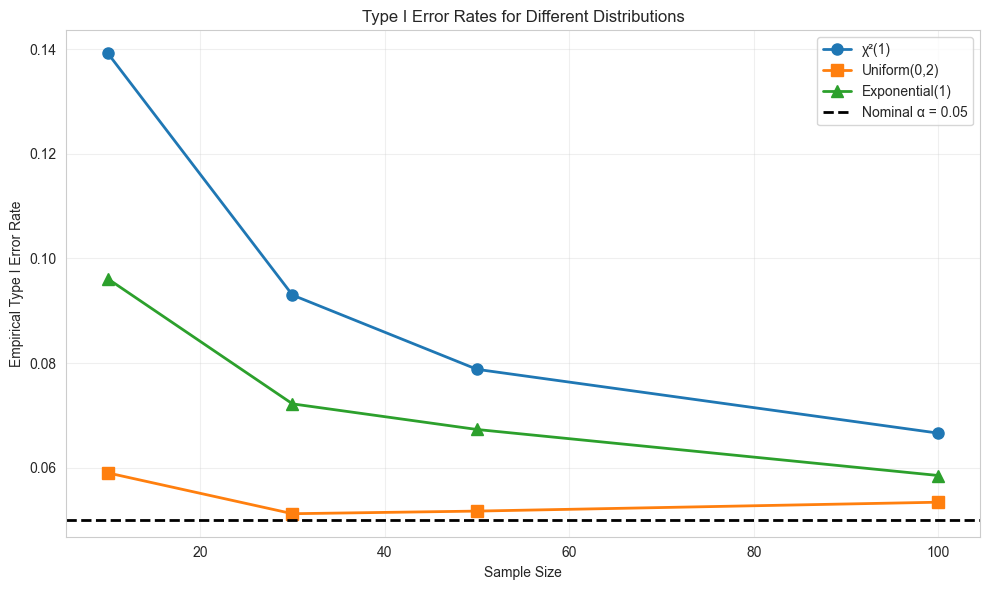

In [35]:
summary_df = pd.DataFrame({
    'Sample_Size': sample_sizes,
    'ChiSquare': results_chisq,
    'Uniform': results_uniform,
    'Exponential': results_exp
})

print("\nSummary Table:")
print(summary_df.to_string(index=False))

plt.figure(figsize=(10, 6))
plt.plot(sample_sizes, results_chisq, 'o-', label='χ²(1)', linewidth=2, markersize=8)
plt.plot(sample_sizes, results_uniform, 's-', label='Uniform(0,2)', linewidth=2, markersize=8)
plt.plot(sample_sizes, results_exp, '^-', label='Exponential(1)', linewidth=2, markersize=8)
plt.axhline(alpha, color='black', linestyle='--', linewidth=2, label=f'Nominal α = {alpha}')
plt.xlabel('Sample Size')
plt.ylabel('Empirical Type I Error Rate')
plt.title('Type I Error Rates for Different Distributions')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('../artifacts/type1_error_plot.png', dpi=300, bbox_inches='tight')
plt.show()

### Discussion

**Key Findings:**

1. **χ²(1)**: Highly right-skewed distribution. Type I error rates deviate from α=0.05 for small samples but converge as n increases due to the Central Limit Theorem.

2. **Uniform(0,2)**: Symmetric but non-normal distribution. Shows good performance even for small samples due to symmetry. Type I error rates remain close to α=0.05 across all sample sizes.

3. **Exponential(1)**: Right-skewed distribution. Similar to χ²(1), shows deviation for small samples but improves with larger n.

**Conclusion**: The t-test is robust to mild departures from normality, especially for symmetric distributions. For skewed distributions, larger sample sizes are needed to maintain the nominal Type I error rate.